In [1]:
import ragas
from datasets import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
import sys
import os

current = os.path.dirname(os.path.realpath("."))
parent = os.path.dirname(current)
sys.path.append(parent)

from capstone import secrets

# Only using Open AI because I don't have a GPU and I can't run models locally
os.environ["OPENAI_API_KEY"] = secrets.OPENAI_API_KEY

In [3]:
retrieval_strategy = "mmr"
model = "llama-2-7b.Q3_K_M"


with open(f"./cache/{retrieval_strategy}_{model}_responses.pickle", "rb") as handle:
    rag_responses = pickle.load(handle)

In [4]:
test_data = Dataset.from_dict(rag_responses)

metrics = [
    ragas.metrics.answer_relevancy,  # Scores the relevancy of the answer according to the given question.
    ragas.metrics.answer_similarity,  # Scores the semantic similarity of ground truth with generated answer.
    ragas.metrics.answer_correctness,  # Measures answer correctness compared to ground truth as a combination of factuality and semantic similarity.
    # ragas.metrics.context_precision,  # Average Precision is a metric that evaluates whether all of the relevant items selected by the model are ranked higher or not.
    # ragas.metrics.context_recall,  # Estimates context recall by estimating TP and FN using annotated answer and retrieved context.
    # ragas.metrics.context_entity_recall,  # Calculates recall based on entities present in ground truth and context.
]

In [5]:
results = ragas.evaluate(test_data, metrics, raise_exceptions=False)

results_df = results.to_pandas()

Evaluating:   0%|          | 0/57 [00:00<?, ?it/s]

,question,contexts,answer,ground_truth,answer_relevancy,answer_similarity,answer_correctness
0,Which class involves time series analysis?,"[Data Mining II (SIADS 632), Learning Outcomes...",Data Manipulation and Visual Exploration of D...,"Data Mining II, SIADS 632 includes a particula...",0.811389,0.852630,0.713158
1,Who teaches the SQL and Databases class?,"[SQL and Databases (SIADS 511), Instructor And...",The instructor is Graham Hukill (gshukill@umi...,The primary instructor for SQL and Databases i...,0.953653,0.851204,0.712801
2,What are the prerequisites for Data Science fo...,"[Data Science for Social Good (SIADS 688), Cou...",SIADS 630 and SIADS 631 are prerequisites for...,"SIADS 630, 631, and 694",0.832256,0.845248,0.586312
3,When are the office hours for the Math Methods...,"[Math Methods II (SIADS 602), Course Schedule:...",The office hours for Math Methods are on Wedn...,Office hours for Math Methods are held at the ...,0.988791,0.917342,0.229343
4,Are there any weekly readings for Milestone II?,"[Milestone II (SIADS 696), Weekly Readings: Th...","No, there are no weekly readings for Mileston...",There is introductory material during the firs...,0.997342,0.820131,0.580033
5,What are the outcomes of Qualitative Inquiry?,[Qualitative Inquiry for Data Scientists (SIAD...,Qualitative research is a methodology used in...,"Upon successful completion of this course, stu...",0.866587,0.834396,0.677349
6,What textbook is required for SIADS 505?,"[Health Analytics (SIADS 681), Weekly Readings...",SIADS 505 does not require a textbook.\n,Python for Data Analysis: Data Wrangling with ...,0.953536,0.703063,0.175766
7,What textbook is required for Data Manipulation?,"[Data Manipulation (SIADS 505), Course Syllabu...",The textbook for Data Manipulation is _Storyt...,Python for Data Analysis: Data Wrangling with ...,0.974097,0.790546,0.197637
8,Which week of unsupervised learning covers DBS...,"[Unsupervised Learning (SIADS 543), Learning O...",Week 2.\n,Week 2,0.784876,0.933049,0.983276
9,How many credits are required to complete the ...,[Grades/Transcripts > Q: What is the minimum G...,To earn a Master of Applied Data Science degr...,34,0.913068,0.735149,0.933787


In [8]:
results_df = results.to_pandas()

In [9]:
for i in range(len(results_df["question"])):
    print(results_df["question"][i])
    print(">>>", results_df["ground_truth"][i])
    print("-" * 100)
    print(results_df["answer"][i])
    print("")
    print("=" * 100)
    print("=" * 100)
    print("")

Which class involves time series analysis?
>>> Data Mining II, SIADS 632 includes a particular focus on time series analysis.
----------------------------------------------------------------------------------------------------
 Data Manipulation and Visual Exploration of Data both involve time series analysis.



Who teaches the SQL and Databases class?
>>> The primary instructor for SQL and Databases is Graham Hukill. Additional course assistants include, Derek Bruckner, Emily Schemanske, Jungseo Lee, and Toby Kemp.
----------------------------------------------------------------------------------------------------
 The instructor is Graham Hukill (gshukill@umich.edu). The course assistants are Derek Bruckner (dbrucknr@umich.edu), Emily Schemanske (landise@umich.edu), Jungseo Lee (jungseo@umich.edu), Toby Kemp (tobyk@umich.edu).



What are the prerequisites for Data Science for Social Good?
>>> SIADS 630, 631, and 694
------------------------------------------------------------------

In [12]:
results_df["eye_check"] = [
    0, # 'Which class involves time series analysis?',
    1, # 'Who teaches the SQL and Databases class?',
    0, # 'What are the prerequisites for Data Science for Social Good?',
    0, # 'When are the office hours for the Math Methods course?',
    1, # 'Are there any weekly readings for Milestone II?',
    0, # 'What are the outcomes of Qualitative Inquiry?',
    0, # 'What textbook is required for SIADS 505?',
    0, # 'What textbook is required for Data Manipulation?',
    1, # 'Which week of unsupervised learning covers DBSCAN?',
    1, # 'How many credits are required to complete the MADS program?',
    1, # 'How long do students have to complete the MADS program start to finish?',
    0, # 'How many points is the comprehensive oral exam worth in SIADS 593?',
    1, # 'What is the penalty for late submission in SIADS 630?',
    1, # 'How do I get accommodations for a class?',
    0, # 'What is a backpack?',
    1, # 'When is the latest I can drop a course?',
    0, # 'How do I get an override to take a class?',
    0, # 'How do I take a leave of absence from the MADS program?',
    0, # 'What are the prerequisites for Search and Recommender Systems?'
]

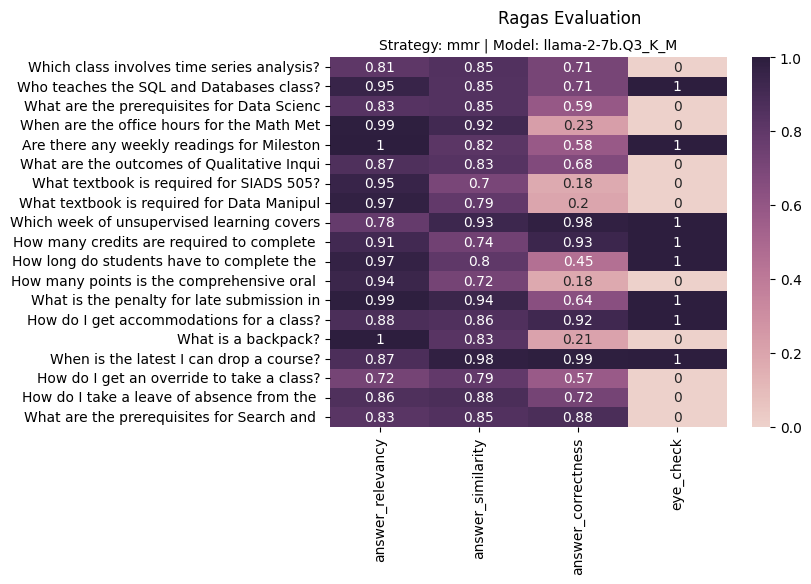

In [13]:
sns.heatmap(
    results_df[
        [
            "answer_relevancy",
            "answer_similarity",
            "answer_correctness",
            # "context_precision",
            # "context_recall",
            # "context_entity_recall",
            "eye_check",
        ]
    ],
    yticklabels=results_df["question"].str[:42],
    annot=True,
    cmap=sns.cubehelix_palette(as_cmap=True),
)

plt.suptitle("Ragas Evaluation")
plt.title(f"Strategy: {retrieval_strategy} | Model: {model}", fontsize=10)

plt.show()